# BLIŽINA, EKSCENTRIČNOST IN VMESNA CENTRALNOST

Pri najinem projektu bova s pomočjo treh različnih mer (ekscentričnosti, bližine in vmesne centralnosti) iskala in analizirala najpomembnejša vozlišča v grafih oziroma socialnih omrežjih. Vozlišče je pomembnejše, če ima višjo vrednost bližine in vmesne centralnosti ter nižjo vrednost ekscentričnosti. Natančnejši opisi pojmov so spodaj. Primerjala bova, kako pogosto je vozlišče, ki je pomembno z vidika ene mere, pomembno tudi v okviru ostalih dveh mer.

Najino glavno orodje za analizo grafov bo $Sage$, kjer bova generirala več grafov (približno 1000) v različnih velikostih (približno 10), grafe socialnih omrežij pa bova pridobila s spleta. Opazovala bova tudi, kako se vrednosti mer za najpomembnejša vozlišča spremenijo, če se omejimo na podgraf v določenem grafu. Grafi, ki jih bova pri projektu analizirala, bodo neusmerjeni.

## Bližina
Bližina je v povezanem grafu mera centralnosti, ki jo izračunamo kot
recipročno vsoto dolžin najkrajših poti med nekim vozliščem in vsemi
drugimi vozlišči v grafu. Bližje kot je opazovano vozlišče ostalim
vozliščem v grafu, bolj centralno je.

\begin{equation*}
C(x) = \frac{1}{\sum_{y}d(y,x)},
\end{equation*}

kjer je *d*(*y*, *x*) razdalja med vozliščema x in y. Pogosto se namesto
zgornje vrednosti izračuna povprečno dolžino najkrajše poti v grafu.
Dobimo jo tako, da zgornjo formulo pomnožimo z *N* − 1, kjer je *N*
število vseh vozlišč v grafu. Pri obsežnejših grafih se  − 1 izpusti iz
enačbe, zato se za bližino uporablja kar sledečo formulo:

\begin{equation*}
C(x) = \frac{N}{\sum_{y}d(y,x)}.
\end{equation*}

Pri usmerjenih grafih je potrebno upoštevati tudi smer povezav. Določeno
vozlišče ima lahko različno bližino za vhodne in izhodne povezave. V
nepovezanih grafih namesto recipročne vsote dolžin najkrajših poti med
vozlišči računamo vsoto recipročnih dolžin najkrajših poti med vozlišči.
Pri tem upoštevamo, da $1/\infty = 0$

\begin{equation*}
H(x) = \frac{N}{\sum_{y \neq x}d(y,x)}.
\end{equation*}

## Ekscentričnost (izsrednost)
Ekscentričnost nekega vozlišča $v$  v povezanem grafu $G$ označimo z $\epsilon(v)$ in je definirana kot maksimalna dolžina med vozliščem $v$ in katerimkoli drugim vozliščem v grafu $G$. V nepovezanih grafih imajo vsa vozlišča neskončno vrednost ekscentičnosti.
Maksimalno ekscentričnost v grafu imenujemo diameter (premer) grafa (najdaljša najkrajša pot med dvema vozliščema grafa), minimalno ekscentričnost pa polmer grafa.

## Vmesna centralnost

V teoriji grafov je vmesna centralnost mera centralizacije grafa, ki temelji na najkrajših poteh v grafu. Za vsak par vozlišč v povezanem grafu, obstaja vsaj ena najkrajša pot med vozliščema tako, da je katerokoli število povezav, po katerih gre ta pot (za neutežene grafe) ali pa vsota uteži na povezavah (za utežene grafe) minimalna. Vmesna centralnost za vsako vozlišče je število teh najkrajših poti, ki grejo skozi vozlišče. Vmesna centralnost se uporablja v mnogih problemih v teoriji omrežij, tudi v problemih povezanih s socialnimi omrežji, biologijo in transportom. V telekomunikacijskem omrežju ima vozlišče z višjo vrednostjo vmesne centralnosti večjo kontrolo nad omrežjem, ker bo več informacij teklo čez to vozlišče. Vmesna centralnost vozlišča $v$ je podana z izrazom:

\begin{equation*}
g(v) = \sum_{s \ne v \ne t}^{ } \frac{\sigma_{st} (v)}{\sigma_{st}}
\end{equation*}

Kjer je $\sigma_{st}$ skupno število najkrajših poti od vozlišča $s$ do vozlišča $t$ in $\sigma_{st} (v)$ je število teh poti, ki grejo skozi $v$. 

## Implementacija algoritma
Torej najprej se bova osredotočila na implementacijo algoritma, ki bo osnovan na podlagi Dijkstrovega algoritma, ki mu bova dodala vse tri mere, glede na katere bova ocenjevala grafe.

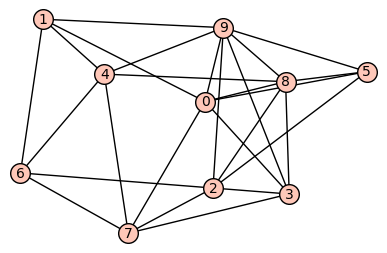

In [1]:
G = graphs.RandomGNP(10, 0.5)
show(G)

In [2]:
def blizina(G):
    seznam = []
    for x in range(len(G.distance_all_pairs())):
        D = 1/sum(G.distance_all_pairs()[x].values())
        seznam.append((x,D))
    return seznam
blizina(G)

[(0, 1/12),
 (1, 1/14),
 (2, 1/12),
 (3, 1/13),
 (4, 1/13),
 (5, 1/14),
 (6, 1/14),
 (7, 1/13),
 (8, 1/12),
 (9, 1/11)]

In [3]:
def ekscentricnost(G):
    seznam = []
    for x in range(len(G.distance_all_pairs())):
        E = G.eccentricity(x)
        seznam.append((x,E))
    return seznam
ekscentricnost(G)

[(0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 2)]

In [4]:
import networkx as nx 

def vmesna_centralnost(G):
    for x in range(len(G.distance_all_pairs())):
        nxG = G.networkx_graph()
        Vslovar = nx.betweenness_centrality(nxG) #to nam vrne slovar, kjer je vozlišče ključ in vmesna centralnost vozlišča vrednost
        V = Vslovar.items() #slovar moramo pretvoriti v seznam, da bo prave oblike za algoritem
        return V
vmesna_centralnost(G)

[(0, 0.0810185185185185),
 (1, 0.030092592592592587),
 (2, 0.09953703703703703),
 (3, 0.01944444444444444),
 (4, 0.05555555555555554),
 (5, 0.005555555555555556),
 (6, 0.030092592592592587),
 (7, 0.05648148148148147),
 (8, 0.04953703703703703),
 (9, 0.10046296296296295)]

In [25]:
def najboljsa_vozlisca(G, velikost, B, E, V):

    najboljsi = round(velikost * 0.2) #zračunamo, koliko najboljših vozlišč bomo vzeli ven, če želimo 20% najboljših
            
    maxB = [] #za bližino želimo dobiti seznam najboljših vozlišč, torej tisth, kjer je bližina največja
    for j in range(najboljsi):
        najboljsiB = 0
        for element in B:
            if najboljsiB < element[1]:
                najboljsiB = max(najboljsiB, element[1]) #poiščemo vozlišče z največjo bližino
                vozlisceB = element[0] #zapomnimo si še vozlišče
                B.remove(element) #ta element odtsranimo iz seznama B
        maxB.append((vozlisceB, najboljsiB))#element dodamo v nov seznam najboljših

    minE = [] #za ekscentričnost želimo dobiti tista vozlišča, kjer je ekscentričnost najmanjša
    for j in range(najboljsi):
        najboljsiE = 10000000000000 #neka velika številka, ker želimo najti minimum
        for elementE in E:
            if najboljsiE > elementE[1]:
                najboljsiE = min(elementE[1], najboljsiE)
                vozlisceE = elementE[0]
                E.remove(elementE)
        minE.append((vozlisceE, najboljsiE))

    maxV = [] #za vmesno centralnost ponovno gledamo največjo vrednost
    for j in range(najboljsi):
        najboljsiV = 0
        for elementV in V:
            if najboljsiV < elementV[1]:
                najboljsiV = max(najboljsiV, elementV[1])
                vozlisceV = elementV[0]
                V.remove(elementV)
        maxV.append((vozlisceV, najboljsiV))

    return(maxB, minE, maxV)


In [26]:
def skupna(maxB, minE, maxV):
    imenaB = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika bližine v nov seznam
    for element in maxB:
        imenaB+= [element[0]]
        
    imenaE = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika ekscentričnosti v nov seznam
    for element in minE:
        imenaE+= [element[0]]

    imenaV = [] #Shranimo samo imena najpomembnejših vozlišč iz vidika vmesne centralnosti v nov seznam
    for element in maxV:
        imenaV+= [element[0]]

    skupna_vozl = set(imenaB).intersection(imenaE).intersection(imenaV) #naredimo presek vsek treh seznamov.
    #Še po parih, če nam bo slučajno pršlo prou ...
    #najp_B_E = set(imenaB).intersection(imenaE)
    #najp_B_V = set(imenaB).intersection(imenaV)
    #najp_E_V = set(imenaE).intersection(imenaV)
    return(skupna_vozl)

In [41]:
def algoritem(velikost):
    povprecje = 0
    for i in range(100):
        G = graphs.RandomGNP(velikost, 0.7) #generiramo graf
        if G.is_connected() == True: #preverimo, če je povezan
            B = blizina(G) #dobimo seznam vozlišč in njihove bližine
            E = ekscentricnost(G) #dobimo seznam vozlišč in njihove ekscentričnosti
            V = vmesna_centralnost(G) #dobimo seznam vozlišč in njihove vmesne centralnosti
            
            maxB, minE, maxV = najboljsa_vozlisca(G, velikost, B, E, V) #naredimo sezname najboljših vozlišč za vsako mero posebej
            skupna_vozlisca = skupna(maxB, minE, maxV) #preverimo, koliko vozlišč je vsem trem meram skupno
            stevilo_skupnih_vozlisc = len(skupna_vozlisca) #preštejemo števila skupnih vozlišč
            pokritost = round(stevilo_skupnih_vozlisc / (velikost * 0.2),3) #zračunamo procent, koliko vozlišč je skupnih vsem trem meram
            povprecje = round((povprecje + pokritost) / 2, 3) #sproti računamo povprečno pokritost za vse grafe
            
        
    return(povprecje)
            
        
        
    
algoritem(43)   

0.091

(0.135, 0.101, 0.06, 0.006, 0.183, 0.022, 0.189, 0.243, 0.2, 0.259)


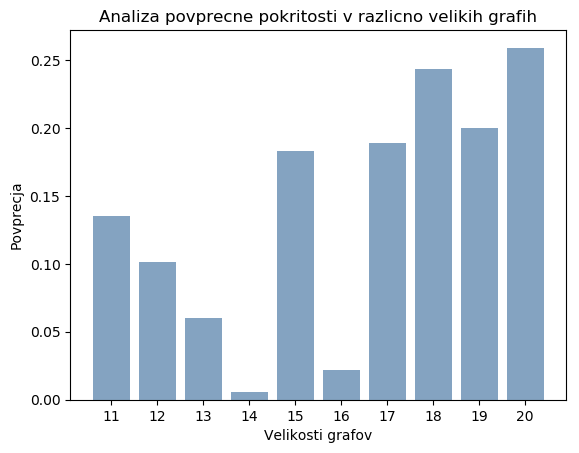

In [74]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

velikosti = (11,12,13,14,15,16,17,18,19,20) #izberemo si velikosti grafov, na katerih bomo delali analizo
seznam_velikosti = list(velikosti)
povprecja = ()
for i in range(10):
    povprecja +=(algoritem(seznam_velikosti[i]),) #za vsako velikost poženemo algoritem, da dobimo povprečno pokritost
print(povprecja)

y_pos = np.arange(len(povprecja))
plt.bar(y_pos,povprecja,align = 'center',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos,velikosti)
plt.xlabel('Velikosti grafov')
plt.ylabel('Povprecja')
plt.title('Analiza povprecne pokritosti v razlicno velikih grafih')
plt.show()

##### Dijkstrov algoritem

In [15]:
from collections import deque, namedtuple


# uporabimo neskončno za začetno razdaljo do vozlišč.
inf = float('inf')
#trojka z začetnm vozliščem, končnim vozliščem in ceno povezave
Edge = namedtuple('Edge', 'start, end, cost')


def make_edge(start, end, cost=1):
  return Edge(start, end, cost)


class Graph:
    def __init__(self, edges):
        # preverimo če so pravi podatki torej če lahko iz tega zgradimo graf
        wrong_edges = [i for i in edges if len(i) not in [2, 3]]
        if wrong_edges:
            raise ValueError('Wrong edges data: {}'.format(wrong_edges))

        self.edges = [make_edge(*edge) for edge in edges]
        vmesna = self.edges
        nova = []
        for edge in vmesna:
            nova.append(make_edge(edge.end, edge.start))
        self.edges = vmesna + nova
        

    @property
    def vertices(self):
        #dobimo množico vozlišč, ki so v grafu
        return set(
            sum(
                ([edge.start, edge.end] for edge in self.edges), []
            )
        )

    def get_node_pairs(self, n1, n2, both_ends=True):
        #dobimo pare vozlišč
        if both_ends:
            node_pairs = [[n1, n2], [n2, n1]]
        else:
            node_pairs = [[n1, n2]]
        return node_pairs

    def remove_edge(self, n1, n2, both_ends=True):
        #funkcija, ki odstrani povezavo med vozliščema
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        edges = self.edges[:]
        for edge in edges:
            if [edge.start, edge.end] in node_pairs:
                self.edges.remove(edge)

    def add_edge(self, n1, n2, cost=1, both_ends=True):
        #funkcija, ki doda povezavo med vozliščema
        node_pairs = self.get_node_pairs(n1, n2, both_ends)
        for edge in self.edges:
            if [edge.start, edge.end] in node_pairs:
                return ValueError('Edge {} {} already exists'.format(n1, n2))

        self.edges.append(Edge(start=n1, end=n2, cost=cost))
        if both_ends:
            self.edges.append(Edge(start=n2, end=n1, cost=cost))

    @property
    def neighbours(self):
        #funkcija, ki najde sosede vsakega vozlišča
        neighbours = {vertex: set() for vertex in self.vertices}
        for edge in self.edges:
            neighbours[edge.start].add((edge.end, edge.cost))

        return neighbours

    def dijkstra(self, source, dest):
        assert source in self.vertices, 'Such source node doesn\'t exist'
        #nastavimo vse razdalje na začetku na neskončno
        distances = {vertex: inf for vertex in self.vertices}
        #prejšna vozlišča, nazačetki vse na None
        previous_vertices = {
            vertex: None for vertex in self.vertices
        }
        #razdalja od začetka do začetka je 0
        distances[source] = 0
        #naredimo kopijo
        vertices = self.vertices.copy()
        #dokler imamo za preverit še kakšno vozlišle
        while vertices:
            #trenutno vozlišče
            current_vertex = min(
                vertices, key=lambda vertex: distances[vertex])
            vertices.remove(current_vertex)
            if distances[current_vertex] == inf:
                break
            for neighbour, cost in self.neighbours[current_vertex]:
                alternative_route = distances[current_vertex] + cost
                if alternative_route < distances[neighbour]:
                    distances[neighbour] = alternative_route
                    previous_vertices[neighbour] = current_vertex

        path, current_vertex = deque(), dest
        while previous_vertices[current_vertex] is not None:
            path.appendleft(current_vertex)
            current_vertex = previous_vertices[current_vertex]
        if path:
            path.appendleft(current_vertex)
        return path


graph = Graph([
    ("a", "b"),("a", "f"), ("c", "d"), ("c", "f"),  ("d", "e"), ("g", "g"),
    ("e", "f")])

graph.dijkstra("a", "d")


deque(['a', 'f', 'c', 'd'])

##### Bližina

In [19]:
def blizina(graph):
    seznam=[]
    for x in graph.vertices:
        D = 0
        for y in graph.vertices:
            D = D + (len(graph.dijkstra(x, y))-1) #minus 1 odštejemo, ker so v seznamu, ki nam ga vrne Dijkstrov algoritem zapisana vsa vozlišča, med                                                      katerimi gledamo povezanost, torej ko preštejemo povezave med temi vozlišči, je ravno ena manj,                                                        kot je vozlišč; npr. za 4 vozlišča imamo vmes 3 povezave
        if D == 0:
            C = float('inf')
        else:
            C = 1/D
        seznam.append((x,C))
    print(seznam)
blizina(graph)

[('a', 1/7), ('c', 1/7), ('b', 1/11), ('e', 1/7), ('d', 1/9), ('g', -1/7), ('f', 1/5)]


##### Ekscentričnost (Izsrednost)

In [17]:
def ekscentricnost(graph):
    seznam=[]
    for x in graph.vertices:
        D = 0
        for y in graph.vertices:
            D = max(D, len(graph.dijkstra(x, y))-1) #minus 1 odštejemo, ker so v seznamu, ki nam ga vrne Dijkstrov algoritem zapisana vsa vozlišča, med                                                      katerimi gledamo povezanost, torej ko preštejemo povezave med temi vozlišči, je ravno ena manj,                                                        kot je vozlišč; npr. za 4 vozlišča imamo vmes 3 povezave
        if D == 0:
            D = float('inf')
        seznam.append((x,D))
    print(seznam)
ekscentricnost(graph)

[('a', 3), ('c', 3), ('b', 4), ('e', 3), ('d', 4), ('g', inf), ('f', 2)]


In [12]:
>>> import networkx as nx 
>>> G=nx.erdos_renyi_graph(50,0.5) 
>>> b=nx.betweenness_centrality(G) 
>>> print(b) 


{0: 0.006364021037225846, 1: 0.01845181284637988, 2: 0.009567003672112818, 3: 0.009622700349484484, 4: 0.00781515416879431, 5: 0.005613118069580917, 6: 0.014232699088977122, 7: 0.01344473549566113, 8: 0.010342693100895063, 9: 0.010703664801883037, 10: 0.009474706148211075, 11: 0.012862939442913534, 12: 0.010355584033772413, 13: 0.00852929523881457, 14: 0.006947963737784929, 15: 0.0034607456130999756, 16: 0.008883567955782367, 17: 0.005290276247145837, 18: 0.005775246237648305, 19: 0.012877382087928145, 20: 0.012756382986942314, 21: 0.009603603375322591, 22: 0.005098560468932301, 23: 0.00751140355278063, 24: 0.0158959886007613, 25: 0.01333400931763303, 26: 0.012499818679626129, 27: 0.0062407972650359075, 28: 0.005989094578510607, 29: 0.013502049394136493, 30: 0.013141543882919382, 31: 0.01012151790321611, 32: 0.011932228538838288, 33: 0.013951863899540335, 34: 0.008379802564680463, 35: 0.009494423580024926, 36: 0.00717108604648489, 37: 0.014007716751544545, 38: 0.008771656242256322, 39:

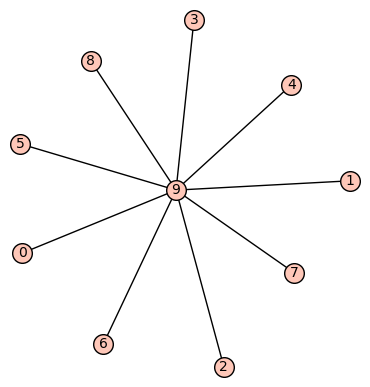

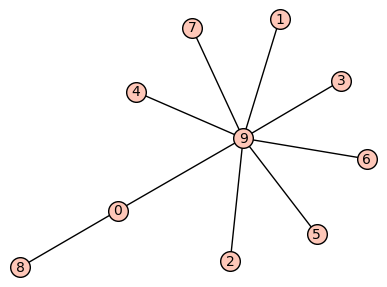

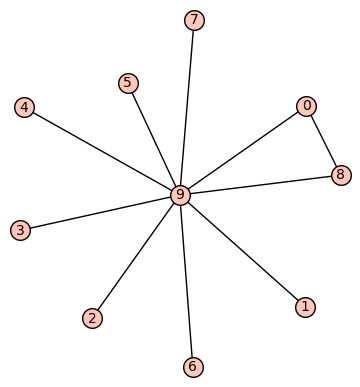

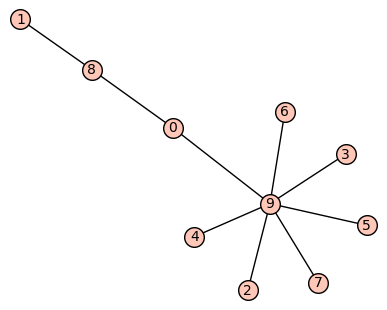

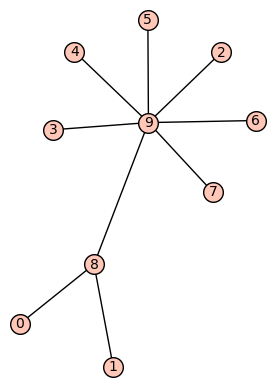

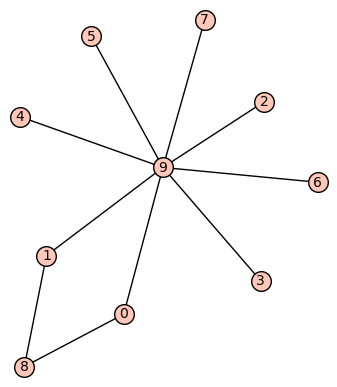

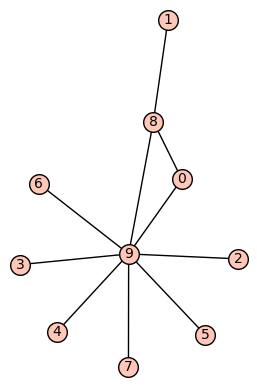

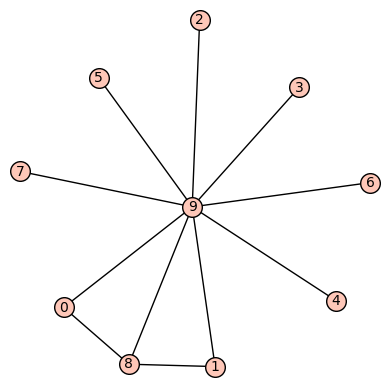

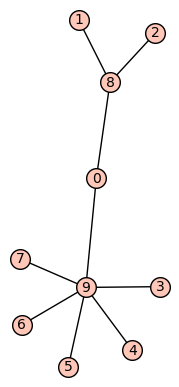

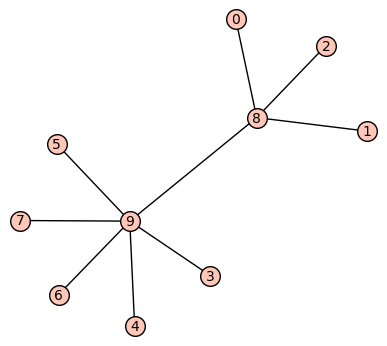

In [13]:
gen = graphs.nauty_geng("10 -c")
for i in range(10):
    G = next(gen)
    G.show()

In [21]:
G = graphs.RandomGNP(1000, 0.05)
#G.show()

In [24]:
nxG = G.networkx_graph()
nx.betweenness_centrality(nxG)

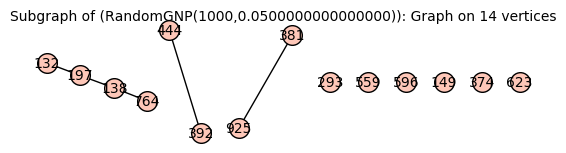

In [27]:
G.random_subgraph(0.01)